In [1]:
# Import some matplolib shortcuts for Jupyter notebook
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from shimi import *
from motion.move import *
from config.definitions import *
from motion.recorder import *
from motion.playback import *
from motion.generative_phrase import *
from audio.audio_demos import *
from audio.play_song_demo import *
from posenet.posenet import *
from utils.utils import *
from wakeword.wakeword_activation import *

import time
import datetime

from copy import deepcopy

import os

import threading

# Load Shimi
shimi = Shimi(silent=False)

local_gestures = {}

pygame 1.9.4
Hello from the pygame community. https://www.pygame.org/contribute.html
Connecting on /dev/tty.usbmodem145101
Found motors with the following IDs: [1, 2, 3, 4, 5]


The cell below defines the recorder object. The first parameter is a reference to the motor controller, the second is a **list** of motor ids, referenced by a convenience property on `shimi`. The options are as follows:
* `shimi.torso`
* `shimi.neck_lr`
* `shimi.neck_ud`
* `shimi.phone`
* `shimi.foot`
* `shimi.all_motors`: this **returns a list**, so you don't need to wrap it in one in this call


The final parameter is the duration for which you want to record.

In [ ]:
r = Recorder(shimi, shimi.all_motors, 5.0)

This starts a recording. It will count down from 3 to let you know when the recording starts, then move Shimi as you want it to move. **The first thing this call does is relax the motors, so be sure it doesn't collapse on itself when you call this.**

In [ ]:
r.record()
r.plot(plt.axes())

Then, run this to play back the recorded gesture.

In [ ]:
r.play(vel_ax=plt.axes())

In [ ]:
r.plot(plt.axes())

In [ ]:
r.trim(0.4, end="front")

### Here are some helper functions.

In [ ]:
# Puts shimi in a neutral position with motors non-compliant
shimi.initial_position()

### **Make sure Shimi will not collapse before you run this!!!**

In [2]:
# Makes the motors compliant
shimi.disable_torque()

In [ ]:
play_outkast(shimi)

In [ ]:
play_opera(shimi)

In [ ]:
p.start_posenet()

In [ ]:
p.stop_posenet()

In [ ]:
PlaySongDemoOnce(shimi)

In [ ]:
import sounddevice as sd
import music21 as m21
import pretty_midi as pm

In [ ]:
test_pm = pm.PrettyMIDI('audio/test.mid')

In [ ]:
out = test_pm.synthesize()

In [ ]:
sd.play(out)

In [ ]:
f = m21.midi.MidiFile()
f.open('audio/test.mid')
f.read()
s = m21.midi.translate.midiFileToStream(f)

In [ ]:
for i in s.melodicIntervals(skipRests=True):
    print(i)

In [ ]:
s.measures(1, 2).analyze('key')

In [ ]:
s.measures(1, 3).pitches

In [ ]:
test_pm.get_downbeats()

In [4]:
from audio.midi_analysis import *
a = MidiAnalysis('audio/test.mid')

A4
G4
C5
E5
D5
G5
F5
E5
C#5
D5
B4
E4


In [ ]:
gp = GenerativePhrase(shimi=shimi)

In [ ]:
gp.generate('audio/test3.mid', 1, 0.0)

In [ ]:
from wakeword.wakeword_activation import *
w = WakeWord(shimi=shimi, on_wake=lambda s: print('Yes?'), respeaker=True)
w.start()

In [ ]:
w.stop()

In [ ]:
w.start()

In [ ]:
m = Move(shimi, shimi.neck_lr, 1.0, 1.5, vel_algo='linear_d')
m.start()

In [ ]:
m = Move(shimi, shimi.phone, 1.0, 0.01).start()

In [ ]:
denormalize_to_range(0.0, 4, 1)

In [ ]:
const = [0.2, 1.0, 1.0]
time = [0.0, 0.6, 2.0]
plt.plot(time, const)
plt.axis([0.0, 2.0, 0.0, 2.0])
plt.xlabel('Time (s)')
plt.ylabel('Velocity (deg/s)')
plt.title('Constant Accel, Constant Vel')
plt.show()

In [18]:
import music21 as m21
import random

In [2]:
s = m21.stream.Stream()

In [11]:
n = m21.note.Note()

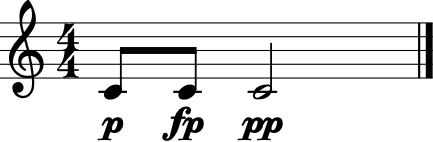

In [39]:
import music21 as m21
import random

quarter = m21.duration.Duration()
half = m21.duration.Duration()
half.quarterLength = 2
eighth = m21.duration.Duration()
eighth.quarterLength = 0.5

pp = m21.dynamics.Dynamic('pp')
p = m21.dynamics.Dynamic('p')
f = m21.dynamics.Dynamic('f')

s = m21.stream.Stream()

n = m21.note.Note()
n.duration = random.choice([eighth, half, quarter])
n1 = m21.note.Note()
n1.duration = random.choice([eighth, half, quarter])
n2 = m21.note.Note()
n2.duration = random.choice([eighth, half, quarter])

s.append(n)
s.append(n1)
s.append(n2)

for n in s.notes:
    s.insert(n.offset, m21.dynamics.Dynamic(random.choice(['pp', 'p', 'fp'])))

# write to midi file
f = m21.midi.translate.streamToMidiFile(s)
f.open("keshav.mid", "wb")
f.write()
f.close()

    
s.show()